# ID das variáveis 'Data'
### 0 = Dados de importação - COMEXSTAT
### 1 = Dados de exportação - COMEXSTAT
### 3 = Dados de movimentações no total - Extraídos neste trabalho

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_0 = pd.read_csv('/content/imp_por_vias_comexstat.csv', sep=';')
data_1 = pd.read_csv('/content/exp_por_vias_comexstat.csv', sep=';')

In [3]:
#data = pd.concat([data_0, data_1])
#data
data_0

,Ano,Via,Quilograma Líquido
0,2023,MARITIMA,158010309810
1,2023,RODOVIARIA,6620809011
2,2023,CONDUTO/REDE DE TRANSMISSAO,4423244968
3,2023,AEREA,228005442
4,2023,FERROVIARIA,35313000
5,2023,MEIOS PROPRIOS,20796129
6,2023,ENTRADA/SAIDA FICTA,14232563
7,2023,COURIER,1269
8,2023,POSTAL,798


In [4]:
data_1

,Ano,Via,Quilograma Líquido
0,2023,MARITIMA,784009868194
1,2023,RODOVIARIA,7712988003
2,2023,FLUVIAL,6533626712
3,2023,AEREA,2161249650
4,2023,VIA NAO DECLARADA,1246608778
5,2023,FERROVIARIA,155892479
6,2023,VICINAL FRONTEIRICO,146524913
7,2023,MEIOS PROPRIOS,9215509
8,2023,EM MAOS,158379
9,2023,CONDUTO/REDE DE TRANSMISSAO,56104


In [5]:
# Adicionando uma coluna indicando ser importação ou exportação
imp = []
for i in range(len(data_0)):
  imp.append('IMP')
data_0['Tipo'] = imp

exp = []
for i in range(len(data_1)):
  exp.append('EXP')
data_1['Tipo'] = exp

In [6]:
# muda a posição da coluna 'Tipo'
data_0 = data_0.loc[:, ['Ano', 'Via', 'Tipo', 'Quilograma Líquido']]
data_1 = data_1.loc[:, ['Ano', 'Via', 'Tipo', 'Quilograma Líquido']]

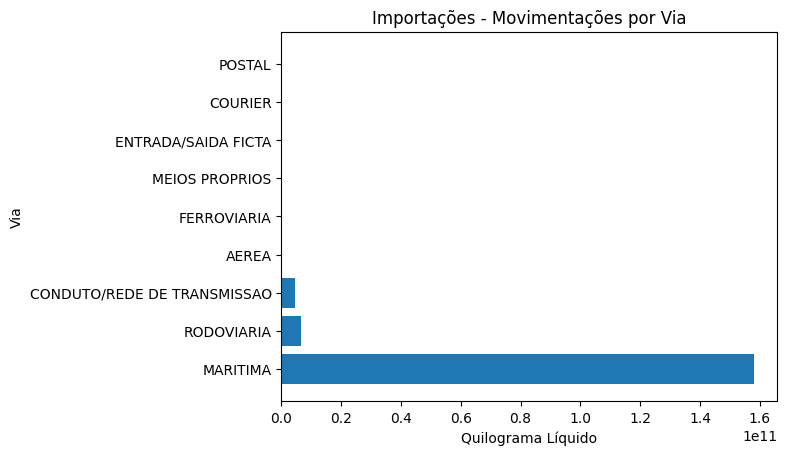

In [7]:
plt.barh(data_0['Via'], data_0['Quilograma Líquido'])
plt.title('Importações - Movimentações por Via')
plt.xlabel('Quilograma Líquido')
plt.ylabel('Via')
plt.show()

In [8]:
data_1

,Ano,Via,Tipo,Quilograma Líquido
0,2023,MARITIMA,EXP,784009868194
1,2023,RODOVIARIA,EXP,7712988003
2,2023,FLUVIAL,EXP,6533626712
3,2023,AEREA,EXP,2161249650
4,2023,VIA NAO DECLARADA,EXP,1246608778
5,2023,FERROVIARIA,EXP,155892479
6,2023,VICINAL FRONTEIRICO,EXP,146524913
7,2023,MEIOS PROPRIOS,EXP,9215509
8,2023,EM MAOS,EXP,158379
9,2023,CONDUTO/REDE DE TRANSMISSAO,EXP,56104


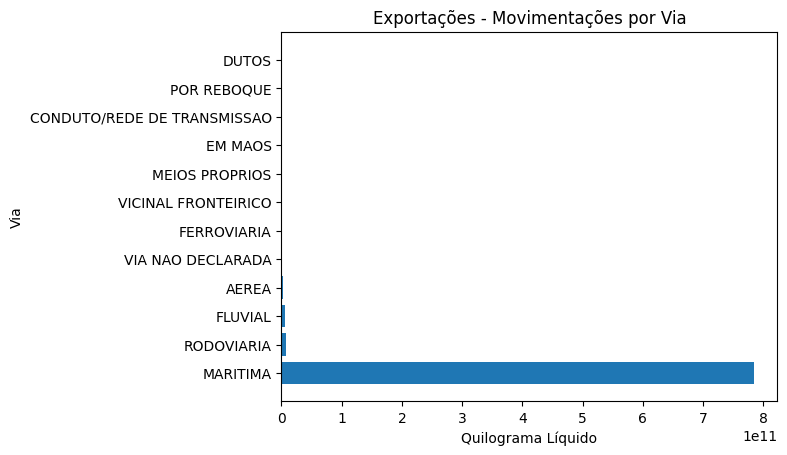

In [9]:
plt.barh(data_1['Via'], data_1['Quilograma Líquido'])
plt.title('Exportações - Movimentações por Via')
plt.xlabel('Quilograma Líquido')
plt.ylabel('Via')
plt.show()

In [19]:
# Removendo as colunas Ano e Tipo
importacao = data_0.drop(columns=['Ano', 'Tipo'])
exportacao = data_1.drop(columns=['Ano', 'Tipo'])

In [22]:
data_3 = importacao.merge(exportacao, how='outer') # concatena os dataframes de importação e exportação

In [30]:
data_3

,Via,Quilograma Líquido
0,MARITIMA,158010309810
1,RODOVIARIA,6620809011
2,CONDUTO/REDE DE TRANSMISSAO,4423244968
3,AEREA,228005442
4,FERROVIARIA,35313000
5,MEIOS PROPRIOS,20796129
6,ENTRADA/SAIDA FICTA,14232563
7,COURIER,1269
8,POSTAL,798
9,MARITIMA,784009868194


In [41]:
# mov_total = movimentações totais por via
mov_total = data_3.groupby('Via').sum().sort_values('Quilograma Líquido', ascending=False) # soma os valores de 'Quilograma Líquido', com base na coluna 'Via' e os ordena de forma decrescente
mov_total

,Quilograma Líquido
Via,
MARITIMA,942020178004
RODOVIARIA,14333797014
FLUVIAL,6533626712
CONDUTO/REDE DE TRANSMISSAO,4423301072
AEREA,2389255092
VIA NAO DECLARADA,1246608778
FERROVIARIA,191205479
VICINAL FRONTEIRICO,146524913
MEIOS PROPRIOS,30011638


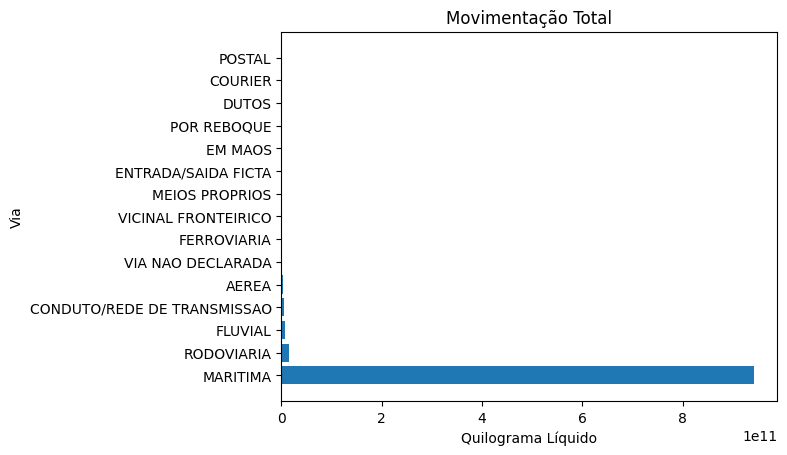

In [44]:
plt.barh(mov_total.index, mov_total['Quilograma Líquido'])
plt.title('Movimentação Total')
plt.xlabel('Quilograma Líquido')
plt.ylabel('Via')
plt.show()

In [54]:
total = mov_total['Quilograma Líquido'].sum() # total de movimentações
print(f'O total de movimentações foi de: {total} bilhões')

O total de movimentações foi de: 971328934058 bilhões
